A Jupyter notebook showing an Unsupervised Learning problem description, EDA procedure, analysis (model building and training), result, and discussion/conclusion.


1.	What problem do you solve?
2.	What ML approach do you use, or what methods does your app use?
3.	Show the result or run an app demo.




# Practice for 5510 Unsupervised Machine Learning

Repository LinkRepository Link: 

https://github.com/eminentli/unsupervised_machine_learn_practice


# Problem Statement

The grocery retail industry is highly competitive and requires companies to constantly innovate and adapt to changing consumer preferences. One way to do this is through customer segmentation analysis, which helps firms better understand their customers and tailor their products and marketing strategies to meet their specific needs.

By using unsupervised machine learning techniques, the grocery firm can identify meaningful customer segments based on similarities and differences in purchasing behavior, demographics, and other relevant variables. Once the segments are identified, the firm can tailor its product offerings and marketing strategies to each segment, improving customer satisfaction and loyalty. For instance, instead of wasting resources on marketing efforts to all customers, the company can focus on the specific needs and interests of each segment and create personalized experiences that are more likely to result in incremental sales and customer retention.

Data Source:

https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign/download?datasetVersionNumber=8


The file contains data for 2240 customers across 29 attributes. it includes customer demographic information (year_birty, education, etc.), the customer's transaction with the grocery firm (purchase on different product, purchase through different channel, etc), and the customer response to the campaigns from the grocry firm.


# EDA

## Import Necessary Libraries

In [1]:
#Importing the Libraries

from datetime import datetime, date
import numpy as np
import pandas as pd
# import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

## Load Data

In [2]:
#Loading the dataset
data = pd.read_csv("./data/marketing_campaign.csv", sep=";")
print("Number of datapoints:", len(data))

# Setting pandas to display all columns
pd.set_option('display.max_columns', None)

data.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


Get the detail explanation of each column from dataset document

|     Columns                          |     Description                                                       |
|--------------------------------------|-----------------------------------------------------------------------|
|         ID                           | Customer's id                                                         |
|         Year_Birth                   | Customer's year of birth                                              |
|         Education                    | Customer’s level of education                                         |
|         Marital_Status               | Customer’s marital status                                             |
|         Income                       | Customer’s yearly household income                                    |
|         Kidhome                      | Number of small children in customer’s household                      |
|         Teenhome                     | Number of teenagers in customer’s household                           |
|         calendar_todayDt_Customer    | Date of customer’s enrolment with the company                         |
|         Recency                      | Number of days since the last purchase                                |
|         MntWines                     | Amount spent on wine products in the last 2 years                     |
|         MntFruits                    | Amount spent on fruits products in the last 2 years                   |
|         MntMeatProducts              | Amount spent on meat products in the last 2 years                     |
|         MntFishProducts              | Amount spent on fish products in the last 2 years                     |
|         MntSweetProducts             | Amount spent on sweet products in the last 2 years                    |
|         MntGoldProds                 | Amount spent on gold products in the last 2 years                     |
|         NumDealsPurchases            | Number of purchases made with discount                                |
|         NumWebPurchases              | Number of purchases made through company’s web site                   |
|         NumCatalogPurchases          | Number of purchases made using catalogue                              |
|         NumStorePurchases            | Number of purchases made directly in stores                           |
|         NumWebVisitsMonth            | Number of purchases made through company’s web site                   |
|         AcceptedCmp3                 | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise     |
|         AcceptedCmp4                 | 1 if customer accepted the offer in the 4th campaign, 0 otherwise     |
|         AcceptedCmp5                 | 1 if customer accepted the offer in the 5th campaign, 0 otherwise     |
|         AcceptedCmp1                 | 1 if customer accepted the offer in the 1st campaign, 0 otherwise     |
|         AcceptedCmp2                 | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise     |
|         Complain                     | 1 if customer complained in the last 2 years                          |
|         Z_CostContact                | Cost to contact a customer                                            |
|         Z_Revenue                    | Revenue after client accepting campaign                               |
|         Response                     | 1 if customer accepted the offer in the last campaign, 0 otherwise    |

## Clean Data

In this section, we will clean the dataset to prepare it for building a machine learning model.



In [3]:
#Information on features 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
stat = data.describe().transpose()
stat

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


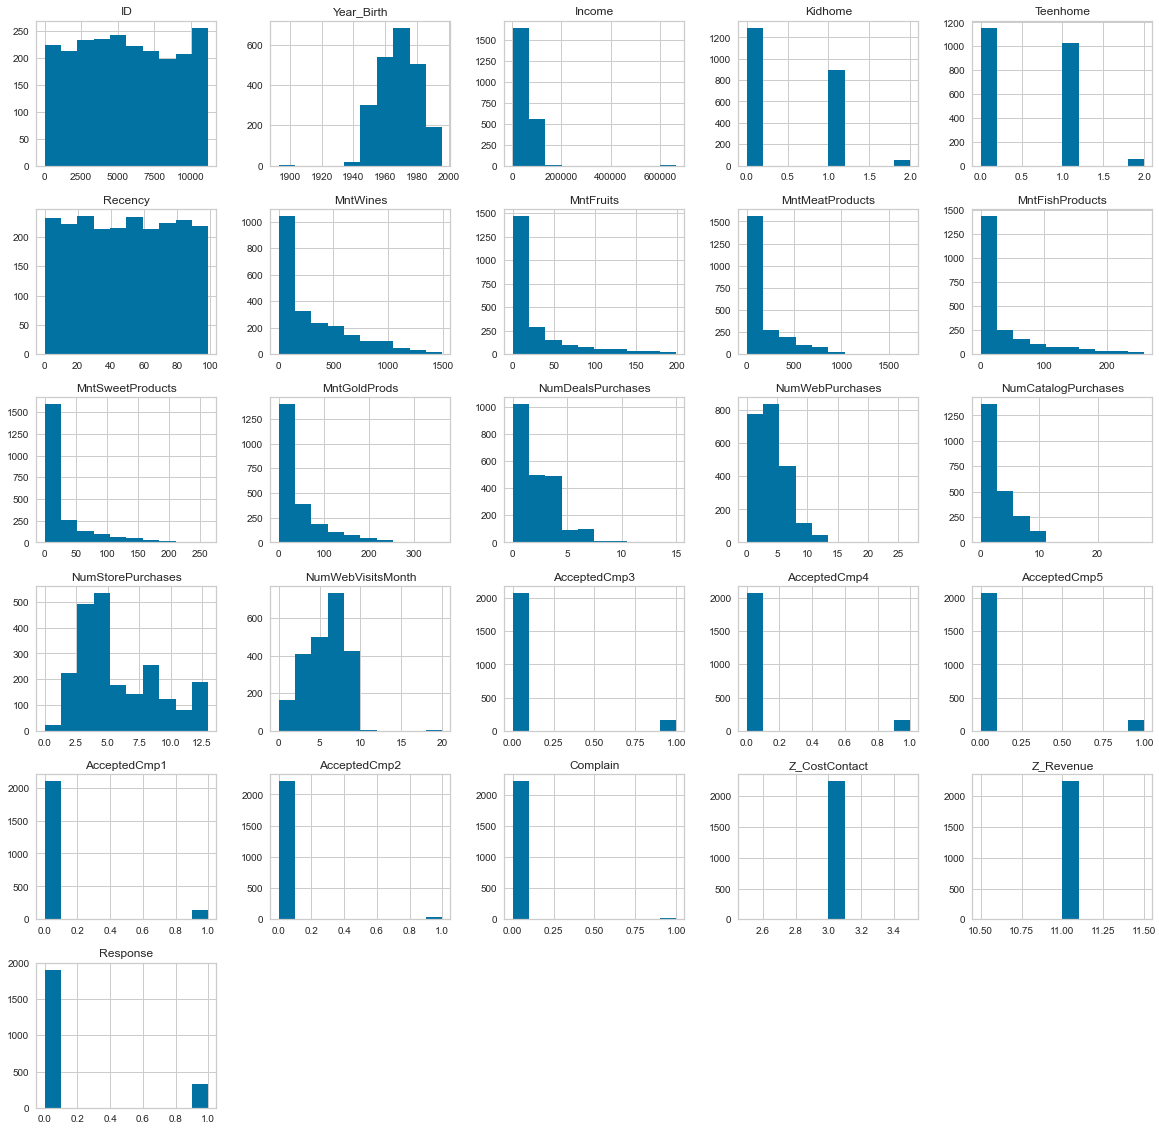

In [5]:
# display histograms for all variables
data.hist(figsize=(20,20))
plt.show()

In [6]:
# Check null values

data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:

# get the list of categorical columns in the dataframe
cat_cols = data.select_dtypes(include=['object']).columns.tolist()

# loop through each categorical column and print its value counts
for col in cat_cols:
    print('---' + col + '---')
    print(data[col].value_counts())

---Education---
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
---Marital_Status---
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
---Dt_Customer---
2012-08-31    12
2012-09-12    11
2013-02-14    11
2014-05-12    11
2013-08-20    10
              ..
2012-08-05     1
2012-11-18     1
2013-05-25     1
2013-04-14     1
2014-01-09     1
Name: Dt_Customer, Length: 663, dtype: int64


**Observations:**

* There are 24 missing values in income.
* Dt_Customer (the date a customer joined the database) is in string format instead of DateTime format.
* There are 2 categorical features in our data frame (Education, Marital_Status). 
* Z_CostContact & Z_Revenue are constant 

Firstly, as there are only 24 records (out of 2240) with missing value, let's simply drop those records. 

In [8]:
#To remove the NA values
data = data.dropna()
print("The number of records after removing the rows with missing values are:", len(data))

The number of records after removing the rows with missing values are: 2216


And then for Dt_Customer, let's convert it as the number of days a customer is registered in the firm's database. 

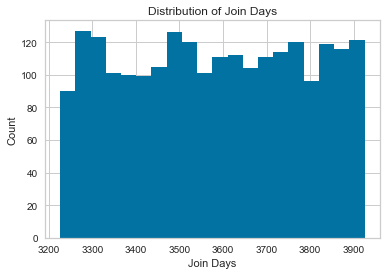

In [9]:

# Convert the 'Dt_Customer' column to datetime format
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

# Calculate the difference between today's date and the 'Dt_Customer' column
data['join_days'] = (pd.to_datetime(date.today()) - data['Dt_Customer']).dt.days


# Create a histogram of the 'join_days' column
data['join_days'].plot(kind='hist', bins=20)

# Set the title and labels for the histogram
plt.title('Distribution of Join Days')
plt.xlabel('Join Days')
plt.ylabel('Count')

# Show the histogram
plt.show()

**Furthermore, let's engineer some new features using the following steps:**

* Extract the age of each customer based on their birth year specified in the "Year_Birth" feature.
* Create a new feature called **"Spent"** to represent the total amount spent by the customer across various categories over a two-year period.
* Utilize the "Marital_Status" feature to create a new feature called **"Living_With"** that indicates the living situation of couples.
* Create a feature named **"Children"** to represent the total number of kids and teenagers in a household.
* Obtain a better understanding of households by creating a feature called **"Family_Size"**.
* Add a new feature named **"Is_Parent"** to indicate if the customer is a parent or not.
* Simplify the **"Education"** feature by categorizing its values into three categories.
* Remove any redundant features.





In [10]:
#Feature Processing
#Age of customer 
data["Age"] = 2024-data["Year_Birth"]

#Total spendings
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation "Alone/Partner"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Create a feature named "Children" to represent the total number of kids and teenagers in a household.
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Obtain a better understanding of households by creating a feature called "Family_Size".
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Add a new feature named "Is_Parent" to indicate if the customer is a parent or not.
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Simplify the "Education" feature by categorizing its values into three categories.
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Remove any redundant features.
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

Now that we have some new features let's have a look at the data's stats. 

In [11]:
stat = data.describe().transpose()
stat

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.0,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.0,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.0,49.0,74.00,99.0
Wines,2216.0,305.091606,337.327920,0.0,24.0,174.5,505.00,1493.0
Fruits,2216.0,26.356047,39.793917,0.0,2.0,8.0,33.00,199.0
Meat,2216.0,166.995939,224.283273,0.0,16.0,68.0,232.25,1725.0
Fish,2216.0,37.637635,54.752082,0.0,3.0,12.0,50.00,259.0
Sweets,2216.0,27.028881,41.072046,0.0,1.0,8.0,33.00,262.0
Gold,2216.0,43.965253,51.815414,0.0,9.0,24.5,56.00,321.0


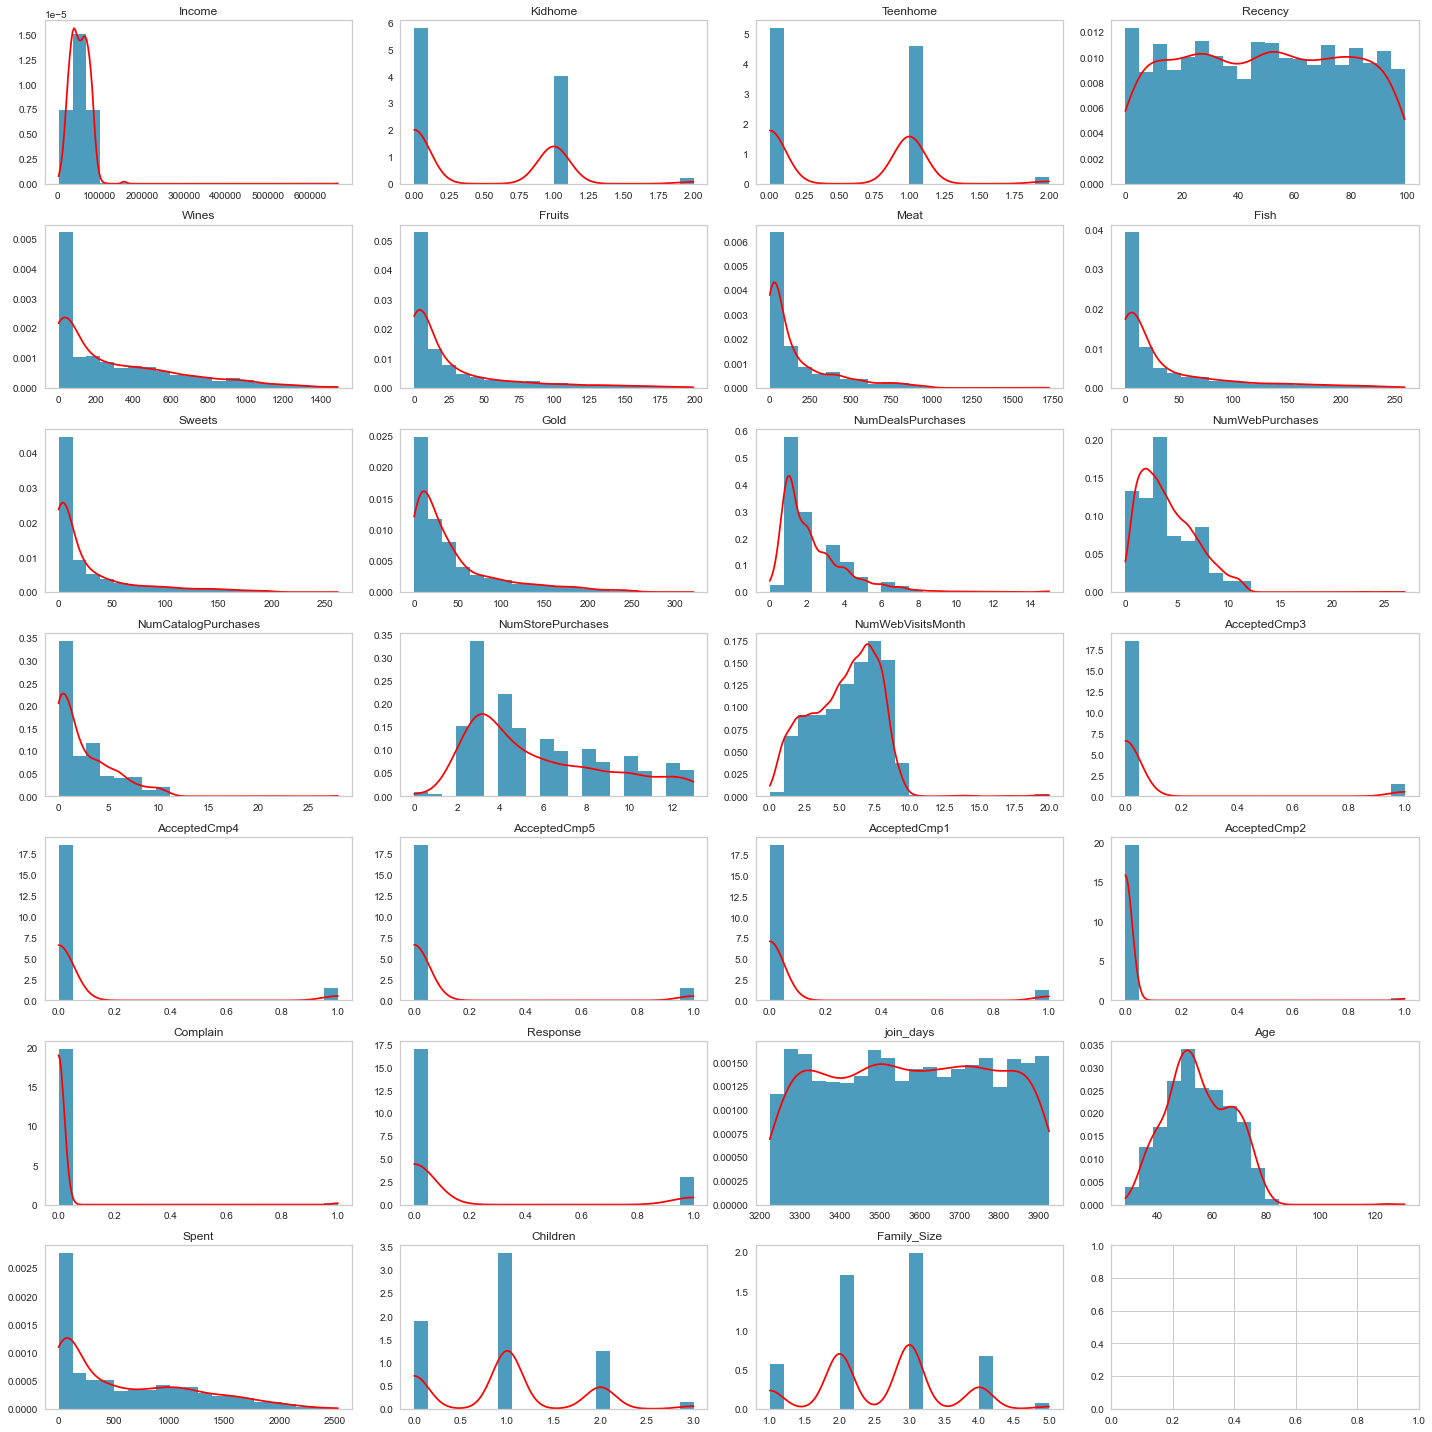

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = data.select_dtypes(include=['float64', 'int64'])
    
# plt.figure(figsize=(20, 10))

    
# Set figure size
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(20, 20))

# Specify bins for histogram
bins = 20

# Loop through columns and plot histogram
for i, column in enumerate(numeric_df.columns):
    # Calculate row and column indices
    row = i // 4
    col = i % 4
    # Select subplot
    ax = axes[row, col]
    # Plot histogram
    ax.hist(numeric_df[column], bins=bins, density=True, alpha=0.7)
    # Add smooth line
    from scipy.stats import gaussian_kde
    density = gaussian_kde(data[column])
    xs = np.linspace(data[column].min(), data[column].max(), 200)
    ax.plot(xs, density(xs), color='red')
    # Set title
    ax.set_title(column)
    ax.grid(False)

    
plt.tight_layout()
plt.show()

In [13]:
# get the list of categorical columns in the dataframe
cat_cols = data.select_dtypes(include=['object']).columns.tolist()

# loop through each categorical column and print its value counts
for col in cat_cols:
    print('---' + col + '---')
    print(data[col].value_counts())

---Education---
Graduate         1116
Postgraduate      846
Undergraduate     254
Name: Education, dtype: int64
---Living_With---
Partner    1430
Alone       786
Name: Living_With, dtype: int64



And from the histogram, we can see there are a few outliers in the Income and Age features. I will delete those outliers.

For Age, the maximum value in the data is 131 years, which represents the age as calculated for the year 2024, although it's worth noting that the data may be outdated.



In [14]:
#Dropping the outliers by setting a cap on Age and income. 
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


Next, let us look at the correlation among the features. 
(Excluding the categorical attributes at this point)

<function matplotlib.pyplot.show(close=None, block=None)>

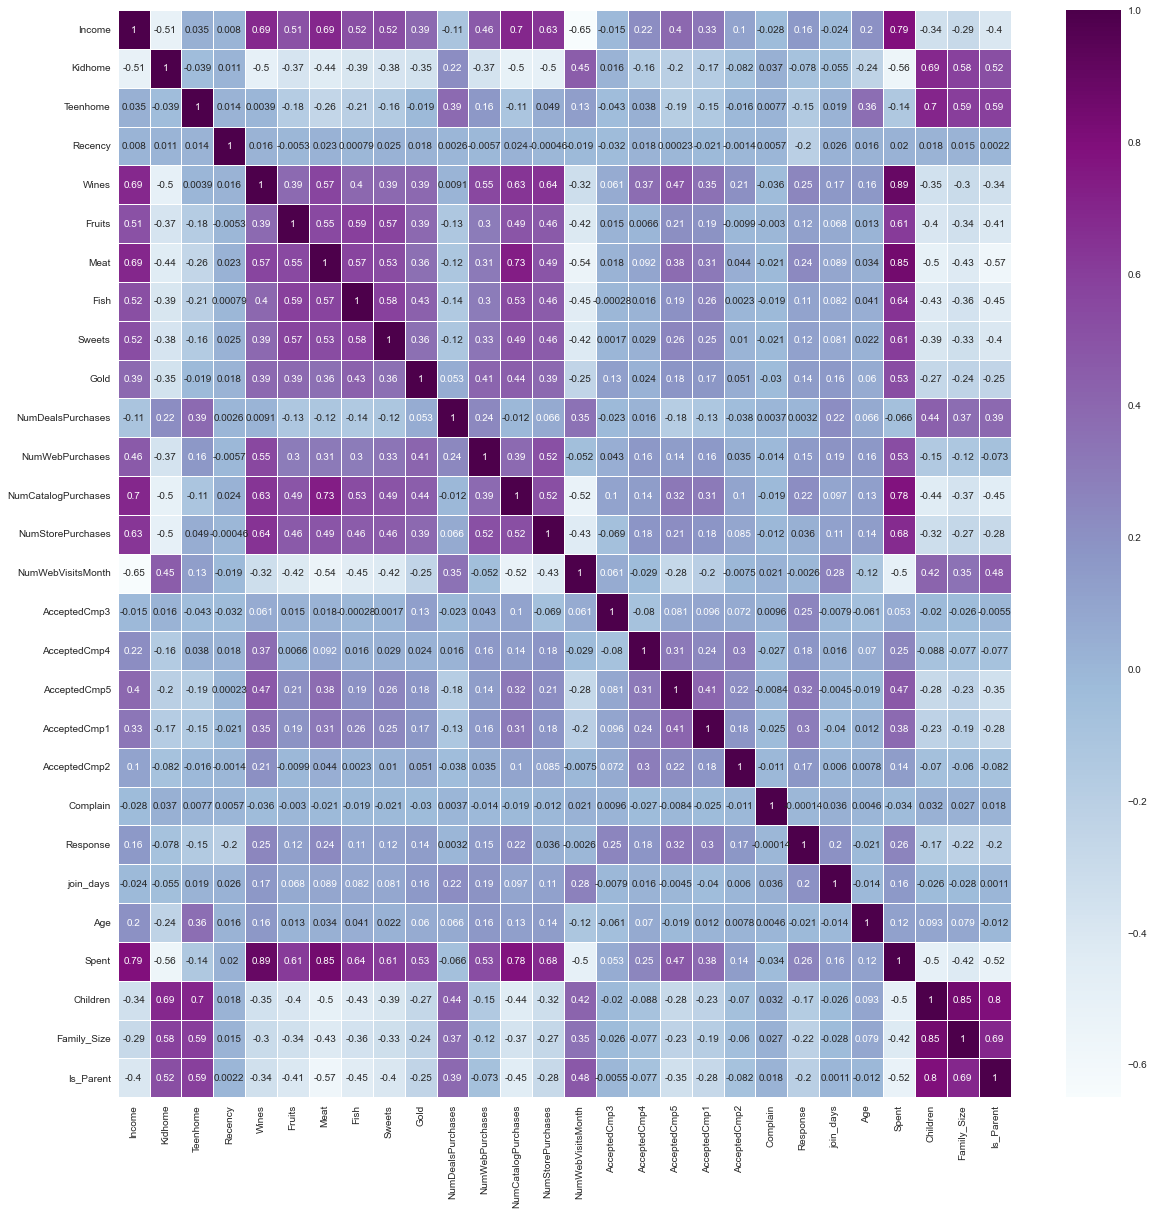

In [15]:
# Plot Correlation 
# from ggplot import *


fig, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(data.corr(),cmap='BuPu',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show




In [16]:
# Generate the correlation matrix
corr = data.corr().round(2)

# Filter the correlation matrix for elements with high positive correlation or negative correlation
high_corr = corr.where(np.abs(corr) > 0.75).dropna(axis=1, how='all').dropna(axis=0, how='all')

# Display the variable pairs with high positive correlation or negative correlation

print('Variable Pair | Correlation')
print('-' *30)
for i in range(len(high_corr.columns)):
    for j in range(i + 1, len(high_corr.columns)):
        if high_corr.iloc[i, j] > 0.75:
            print('{} & {} | {}'.format(high_corr.columns[i], high_corr.columns[j], high_corr.iloc[i, j]))
        elif high_corr.iloc[i, j] < -0.75:
            print('{} & {} | {}'.format(high_corr.columns[i], high_corr.columns[j], high_corr.iloc[i, j]))

Variable Pair | Correlation
------------------------------
Income & Spent | 0.79
Wines & Spent | 0.89
Meat & Spent | 0.85
NumCatalogPurchases & Spent | 0.78
Children & Family_Size | 0.85
Children & Is_Parent | 0.8


**Observations**
* The pair of variables with high positive correlation or negative correlation are shown above. It's not supprise to see that Income & Spent are highly correlated.


## Data Preprocessing

Then we will transform the data to be used in clusting analysis

* Label encoding the categorical features: This process converts categorical features to numerical features by assigning each category a unique integer value.
* Scaling the features using the standard scaler: This process scales the features to a common scale by subtracting the mean and dividing by the standard deviation.
* Creating a subset dataframe for dimensionality reduction: This process creates a subset of the dataframe that contains only the features that will be used for dimensionality reduction.



In [17]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [18]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [19]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features about campaigns
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [20]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,join_days,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


In [21]:
stat = scaled_ds.describe().transpose().round(2)
stat

,count,mean,std,min,25%,50%,75%,max
Education,2212.0,0.0,1.0,-0.89,-0.89,-0.89,0.57,2.04
Income,2212.0,-0.0,1.0,-2.33,-0.78,-0.03,0.77,5.13
Kidhome,2212.0,0.0,1.0,-0.82,-0.82,-0.82,1.04,2.90
Teenhome,2212.0,0.0,1.0,-0.93,-0.93,-0.93,0.91,2.75
Recency,2212.0,0.0,1.0,-1.69,-0.86,-0.00,0.86,1.73
Wines,2212.0,0.0,1.0,-0.91,-0.83,-0.38,0.59,3.52
Fruits,2212.0,0.0,1.0,-0.66,-0.61,-0.46,0.17,4.35
Meat,2212.0,0.0,1.0,-0.74,-0.67,-0.44,0.29,6.95
Fish,2212.0,-0.0,1.0,-0.69,-0.63,-0.47,0.23,4.04
Sweets,2212.0,0.0,1.0,-0.66,-0.63,-0.46,0.14,5.72


<function matplotlib.pyplot.show(close=None, block=None)>

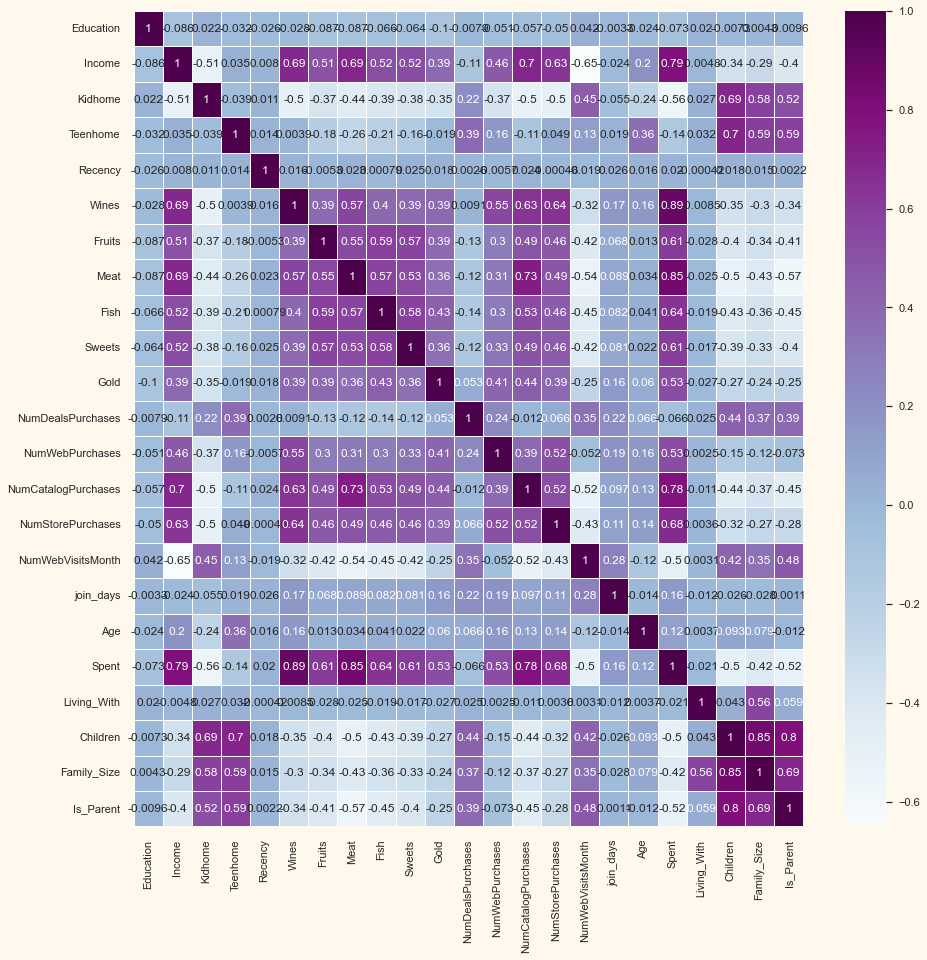

In [39]:
# Plot Correlation 
# from ggplot import *


fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(scaled_ds.corr(),cmap='BuPu',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show



In [23]:
# Generate the correlation matrix
corr = data.corr().round(2)

# Filter the correlation matrix for elements with high positive correlation or negative correlation
high_corr = corr.where(np.abs(corr) > 0.75).dropna(axis=1, how='all').dropna(axis=0, how='all')

# Display the variable pairs with high positive correlation or negative correlation

print('Variable Pair | Correlation')
print('-' *30)
for i in range(len(high_corr.columns)):
    for j in range(i + 1, len(high_corr.columns)):
        if high_corr.iloc[i, j] > 0.75:
            print('{} & {} | {}'.format(high_corr.columns[i], high_corr.columns[j], high_corr.iloc[i, j]))
        elif high_corr.iloc[i, j] < -0.75:
            print('{} & {} | {}'.format(high_corr.columns[i], high_corr.columns[j], high_corr.iloc[i, j]))

Variable Pair | Correlation
------------------------------
Income & Spent | 0.79
Wines & Spent | 0.89
Meat & Spent | 0.85
NumCatalogPurchases & Spent | 0.78
Children & Family_Size | 0.85
Children & Is_Parent | 0.8


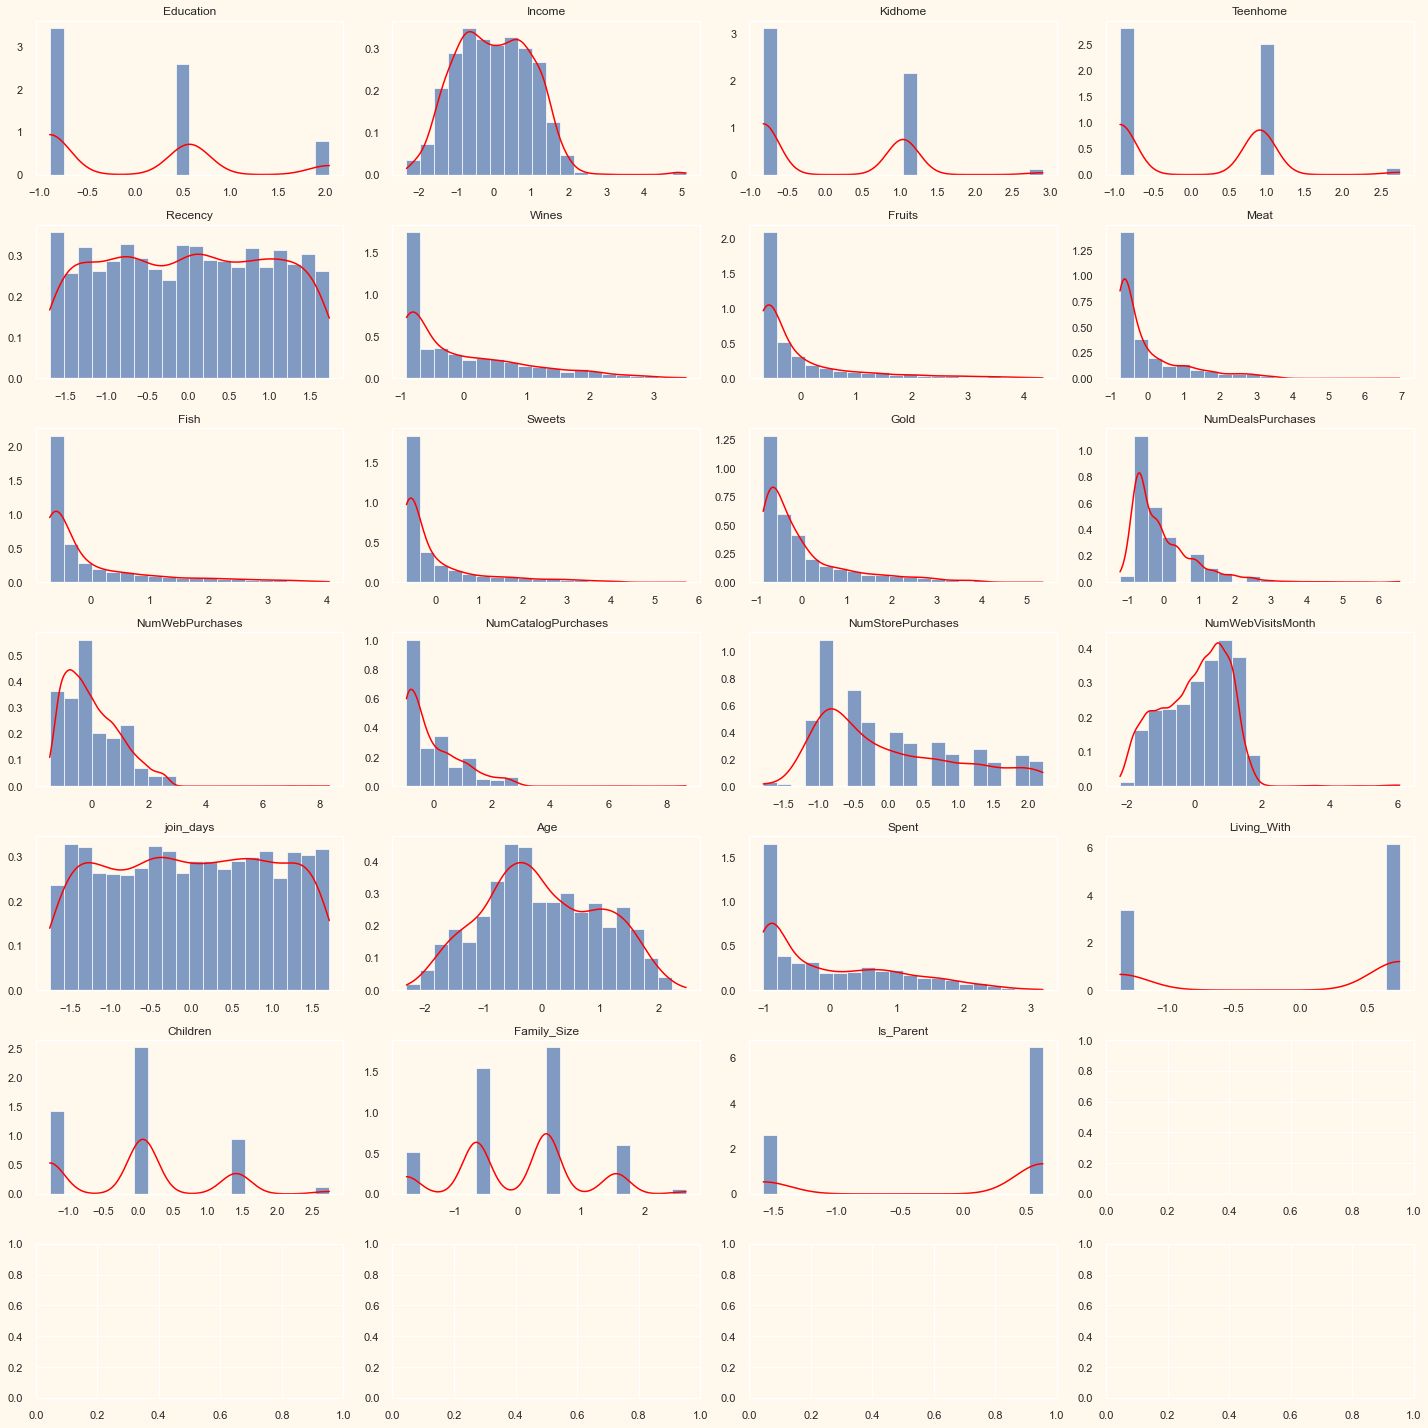

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = scaled_ds.select_dtypes(include=['float64', 'int64'])
    
# plt.figure(figsize=(20, 10))

    
# Set figure size
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(20, 20))

# Specify bins for histogram
bins = 20

# Loop through columns and plot histogram
for i, column in enumerate(numeric_df.columns):
    # Calculate row and column indices
    row = i // 4
    col = i % 4
    # Select subplot
    ax = axes[row, col]
    # Plot histogram
    ax.hist(numeric_df[column], bins=bins, density=True, alpha=0.7)
    # Add smooth line
    from scipy.stats import gaussian_kde
    density = gaussian_kde(numeric_df[column])
    xs = np.linspace(numeric_df[column].min(), numeric_df[column].max(), 200)
    ax.plot(xs, density(xs), color='red')
    # Set title
    ax.set_title(column)
    ax.grid(False)

    
plt.tight_layout()
plt.show()

# Dimension Reduction

Now we have 23 features to be used for clustering. The more features there are, the more difficult it is to work with the data. This is because many of the features are correlated, meaning that they are highly related to each other. To remove the redundancy, I will perform dimensionality reduction on the features before putting them for clustering.

Steps in this section:

* Dimensionality reduction with PCA
* Plotting the reduced dataframe

In [25]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["pc1","pc2", "pc3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
pc1,2212.0,1.284887e-17,2.878602,-5.978123,-2.539470,-0.781595,2.386380,7.452915
pc2,2212.0,6.424437e-17,1.709469,-4.194757,-1.323932,-0.173716,1.234923,6.168185
pc3,2212.0,1.606109e-18,1.231685,-3.625184,-0.853556,-0.051292,0.863841,6.746845


In [26]:
pca.explained_variance_ratio_

array([0.36011321, 0.12699844, 0.06592853])

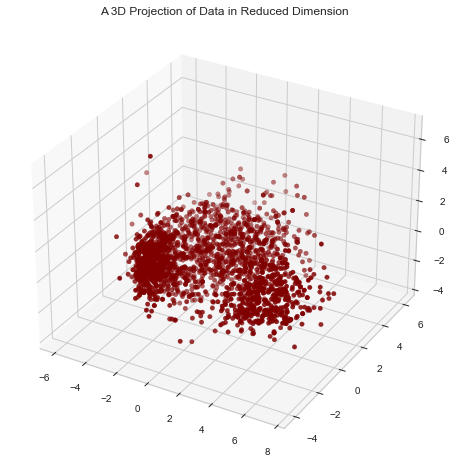

In [27]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["pc1"]
y =PCA_ds["pc2"]
z =PCA_ds["pc3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection of Data in Reduced Dimension")
plt.show()

# CLUSTERING

Now that we reduced the attributes to three dimensions, let's perform clustering via hierarchical clustering method.  It involves merging examples until the desired number of clusters is achieved.

**Steps involved in the Clustering**
* Elbow Method to determine the number of clusters to be formed
* Clustering via hierarchical Clustering
* Examining the clusters formed via scatter plot

Elbow Method to determine the number of clusters to be formed:


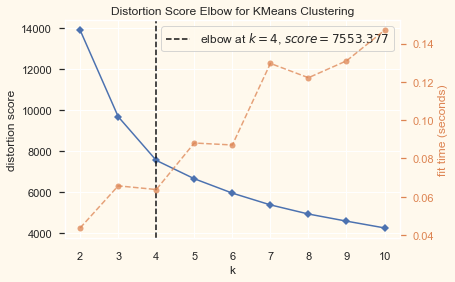

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

The above chart indicates that 4 will be an optimal number of clusters for this data. 
Next, we will be fitting the Hierarchical Clustering Model to get the final clusters. 

In [29]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
 # AgglomerativeClustering(n_clusters=4,linkage='complete', affinity='cosine')

# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

To examine the clusters formed let's have a look at the 3-D distribution of the clusters. 

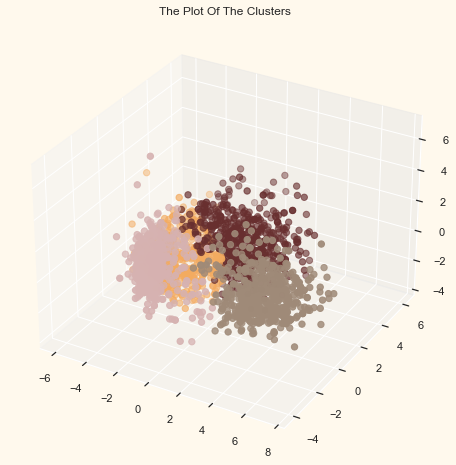

In [30]:
#Plotting the clusters

# sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
# pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [31]:
PCA_ds.head()

,pc1,pc2,pc3,Clusters
0,4.986336,-0.161502,2.445704,2
1,-2.874168,0.022701,-1.530784,3
2,2.615763,-0.731408,-0.264243,2
3,-2.654568,-1.455875,-0.398126,1
4,-0.656015,0.177848,-0.141472,3


In [32]:
len(PCA_ds)

2212

## Evaluate Model

As this is an unsupervised clustering process, we lack a tagged feature for evaluating or scoring our model. Therefore, the objective of this section is to study the underlying patterns within the clusters formed, in order to determine their nature.

To achieve this, we will examine the data through exploratory data analysis (EDA), examining how the clusters relate to each other and drawing conclusions based on our findings.

**Firstly, let us have a look at the group distribution of clustring**

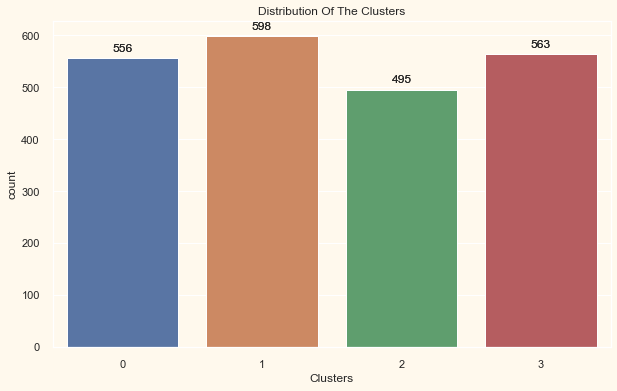

In [33]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]

plt.figure(figsize=(10, 6))
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")

# Add count of each bin
for p in sns.countplot(x=data["Clusters"]).patches:
    pl.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')



The clusters seem to be fairly distributed.

# Profiling

Now that we have formed the clusters, it's time to explore the profile of each one. This includes analyzing their purchasing habits, family status, and other relevant characteristics. By doing so, we can identify our star customers and those who require more attention from the marketing team.

I'll plot personal trait features based on the customer's cluster and draw conclusions from the results.

In [34]:
data.groupby('Clusters').agg(['mean']).transpose()

,Clusters,0,1,2,3
Education,mean,0.516187,0.707358,0.571717,0.632327
Income,mean,61686.300360,30196.083612,75158.397980,45070.410302
Kidhome,mean,0.233813,0.714047,0.006061,0.740675
Teenhome,mean,0.944245,0.065217,0.000000,0.985790
Recency,mean,49.329137,48.020067,49.119192,49.687389
Wines,mean,533.172662,33.178930,606.733333,104.223801
Fruits,mean,35.026978,6.302676,64.115152,5.790409
Meat,mean,190.000000,23.964883,464.745455,34.547069
Fish,mean,48.656475,8.740803,94.529293,7.472469
Sweets,mean,37.334532,6.314381,65.000000,5.538188


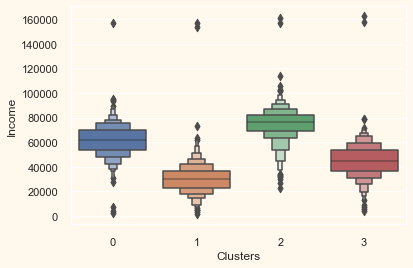

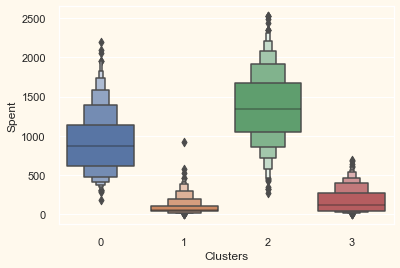

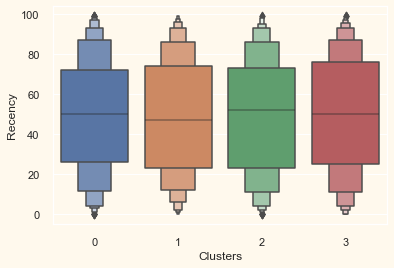

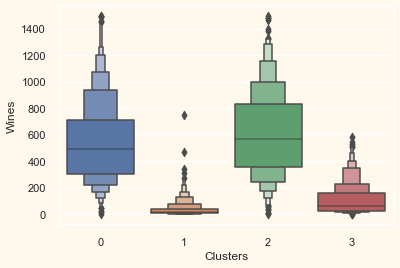

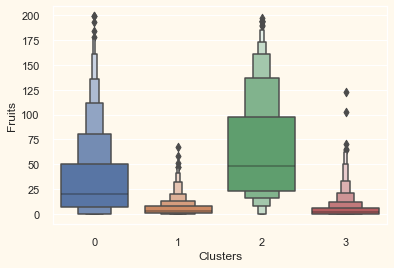

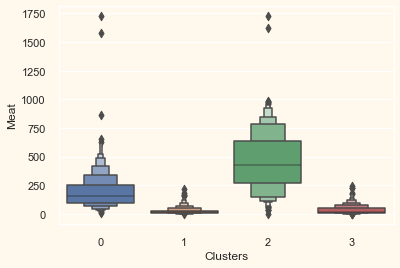

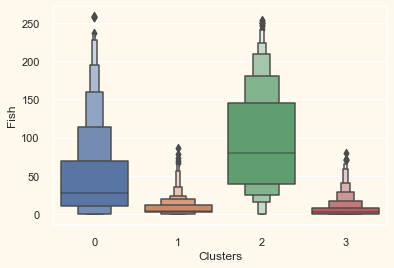

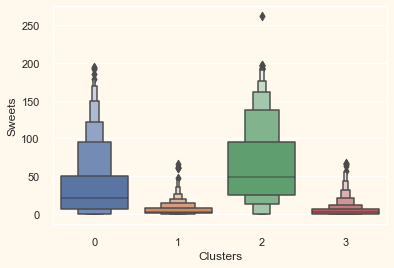

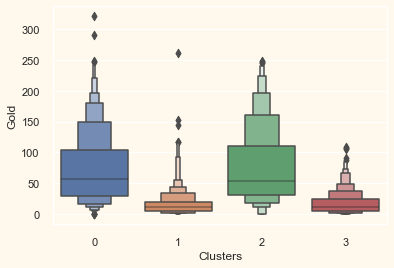

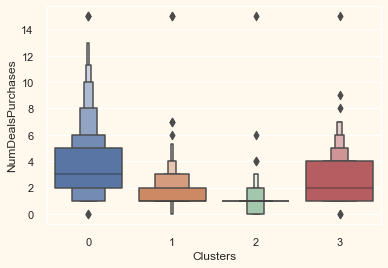

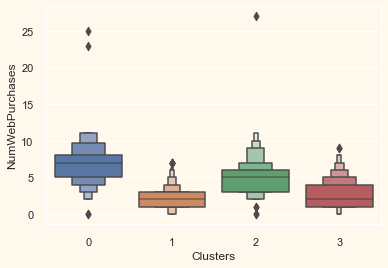

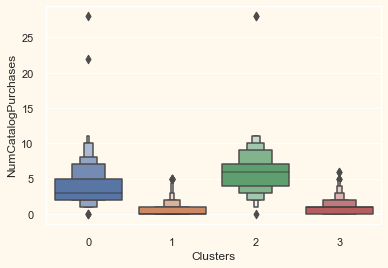

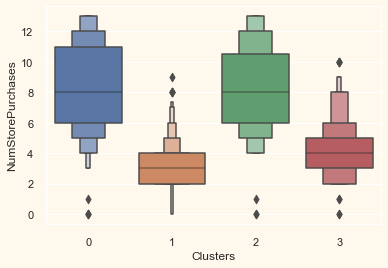

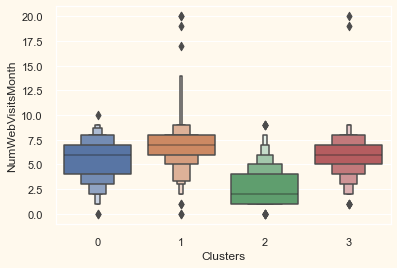

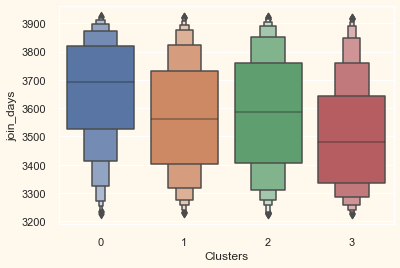

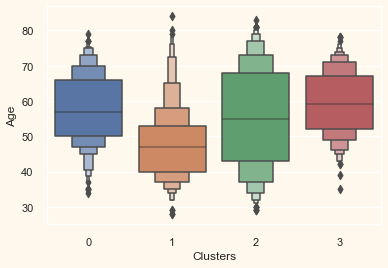

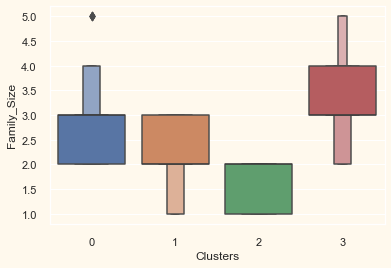

In [35]:




# Group the data by cluster and calculate the mean for all columns
grouped_data = data.groupby('Clusters').mean()

# Iterate through columns and plot chart for each one

categorical_cols =['Education','Kidhome','Teenhome','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Response','Living_With','Children','Is_Parent']
numeric_cols =['Income','Spent','Recency','Wines','Fruits','Meat','Fish','Sweets','Gold','NumDealsPurchases',
               'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','join_days','Age','Family_Size']




for col in numeric_cols:
    # Create plot
    
    # sns.boxenplot(x=data["Clusters"], y=data[col])
    
    
    plt.figure()
    # pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
    pl=sns.boxenplot(x=data["Clusters"], y=data[col])

    # pl=sns.violinplot(x=data["Clusters"], y=data["Spent"], palette=pal)


    plt.show()
    
    
    
#     plt.figure(figsize=(6,4))
#     plt.bar(grouped_data.index, grouped_data[col])
    
#     # Add plot title and labels
#     plt.title(f'Mean of {col} by Cluster Levels')
#     plt.xlabel('Cluster Levels')
#     plt.ylabel('Mean')
#     plt.xticks(rotation=0)
#     plt.show()

In [36]:
# create a crosstab summary of the data by cluster and category
for col in categorical_cols:
    # print(col)
    print(pd.crosstab(data[col],data['Clusters']))

Clusters     0    1    2    3
Education                    
0          307  296  258  254
1          211  181  191  262
2           38  121   46   47
Clusters    0    1    2    3
Kidhome                     
0         428  174  492  187
1         126  421    3  335
2           2    3    0   41
Clusters    0    1    2    3
Teenhome                    
0          62  559  495   28
1         463   39    0  515
2          31    0    0   20
Clusters        0    1    2    3
AcceptedCmp3                    
0             511  550  454  534
1              45   48   41   29
Clusters        0    1    2    3
AcceptedCmp4                    
0             488  595  431  534
1              68    3   64   29
Clusters        0    1    2    3
AcceptedCmp5                    
0             531  597  360  563
1              25    1  135    0
Clusters        0    1    2    3
AcceptedCmp1                    
0             528  597  387  558
1              28    1  108    5
Clusters        0    1    2    3

**clusters pattern**


From the chart, we can clearly see that group 2 has the highest income, followed by group 0. And a similar pattern can be found in spending. However when we look at the number of deals purchases, it seems group 2 doesn’t care too much about the deals. When looking at age, group 1 is relatively younger than the others. In terms of family size, group 3 has the biggest family size among the clusters, while group 2 has the smallest family size. 

Summary for the clusters:

* Segment 0: Deal-loving parents with high income and high spending habits
* Segment 1: Budget-conscious young families with low income and low spending habits
* Segment 2: High-spending, no-kids, high-income individuals who prioritize quality over deals
* Segment 3: Large, low-spending families with mid-level income and children


Name each cluster to make it more understandable
* Segment 0: Affluent Family Savers
* Segment 1: Young Thrifty Parents
* Segment 2: Quality-Seeking High Rollers
* Segment 3: Large Family Budgeteers
				



# Conclusion


* For Segment ‘Quality-Seeking High Rollers’ , they are the star customers of the company, they have high income and are willing to spend a lot in the company, the tactic is to maintain the loyalty of this group of customers and recommend premium products and services to them.

* For the segment ‘Affluent Family Savers’, they are also willing to pay, and they are deal lovers. So the tactic is to engage them during big promotions to boost sales.

* For the rest 2 segments, ‘Young Thrifty Parents’ and  ‘Large Family Budgeteers’, they have a relatively lower priority.  
If the marketing budget is limited, we should focus more on the prior 2 segments.